# Python Notebook

Write a program in Python that gets a number in base 10 and prints the number in all the other bases (base 2, base 8 and base 16).

In [10]:
DIGITS = '0123456789abcdef'
def convertToBase(number):
    i=2
    origin=number
    while i<17:
        number = origin
        base=i
        remainders = []
        while number > 0:
            remainder = number % base
            remainders.append(remainder)
            number = number // base
        converted = []
        while remainders:
            converted.append(DIGITS[remainders.pop()])
        print("Converted "+str(origin)+" into base "+str(base)+" : "+''.join(converted)) 
        if i==2: i=8 # switch base from 2 to 8
        elif i==8: i=16 # switch base from 8 to 16
        else: i=20 3 # switch base from 16 to 20 , so we'll be out of the while loop
convertToBase(230) # enter a number

# for each base, save the reminders of dividing again and again the number by the base.
# for each reminder in 'reminders' save it's value from 0 to f by using 'DIGITS' , and add it to 'converted'.
# print 'converted' and move to the next base.

Converted 230 into base 2 : 11100110
Converted 230 into base 8 : 346
Converted 230 into base 16 : e6


In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r'\Users\97254\Desktop\cast.csv')
df

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN
...,...,...,...,...,...,...
3333690,Stuttur Frakki,1993,Sveinbj?rg ??rhallsd?ttir,actress,Flugfreyja,24.0
3333691,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24.0
3333692,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0
3333693,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17.0


**Question 1** <br>
How many movies have the title "Hamlet"?

In [8]:
hamletDuplicate = df.query("title == 'Hamlet'") # save a new df which contains only the movies with Hamlet title
hamlet = hamletDuplicate.drop_duplicates(subset=['year']) # save only one line from each year
# print how many movies have the title Hamlet and then print without duplicates of same years.
print("There are " , (df.title == 'Hamlet').sum() , " movies with the title 'Hamlet'.\nOnly" , hamlet.shape[0] , "are from different years.")

There are  299  movies with the title 'Hamlet'.
Only 17 are from different years.


**Question 2** <br>
List all of the "Treasure Island" movies from earliest to most recent.

In [16]:
# save a new df which contains only the movies with Treasure Island title
# sort this df by years
treasureIsland = (df.query("title == 'Treasure Island'")).sort_values('year')
# save only one movie from each year
# save only 'title' and 'year' columns
treasureIslandClean = (treasureIsland.drop_duplicates(subset=['year'])).drop(columns=['name' , 'type' , 'character' , 'n'])
# set indexs
(treasureIslandClean.reset_index()).drop(columns='index')

,title,year
0,Treasure Island,1918
1,Treasure Island,1920
2,Treasure Island,1934
3,Treasure Island,1950
4,Treasure Island,1972
5,Treasure Island,1973
6,Treasure Island,1985
7,Treasure Island,1999


**Question 3** <br>
How many roles were credited in the silent 1921 version of Hamlet?

In [17]:
# print the length of the df when title is Hamlet and the year is 1921.
print(len(df[(df.title == "Hamlet") & (df.year == 1921)]) , "roles were credited in the silent 1921 version of Hamlet.")

9 roles were credited in the silent 1921 version of Hamlet.


**Question 4** <br>
Use groupby() to plot the number of "Hamlet" films made each decade.

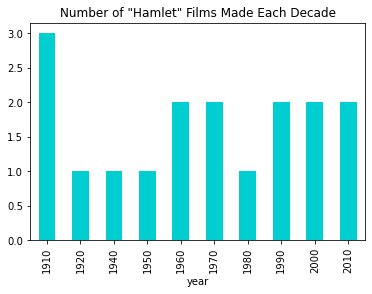

In [11]:
# use the cleaned df "hamlet" from Q1
# divide the years by 10 (without using the reminders) and multiply them by 10 so they'll be saved as rounded dowm values
# count how many movies are from the same decade
# now plot the answers as a bar plot
hamlet.groupby(hamlet.year // 10 * 10).size().plot(kind='bar' , color='darkturquoise' , title='Number of "Hamlet" Films Made Each Decade')

**Question 5** <br>
How many leading (n=1) roles were available to actors, and how many to
actresses, in each year of the 1950s?

In [19]:
byYearsIn1950 = df
# save a new df which contains only the movies from the 1950s
byYearsIn1950 = byYearsIn1950[byYearsIn1950.year // 10 == 195]
# save only the lines that represen a leading role
byYearsIn1950 = byYearsIn1950[byYearsIn1950.n == 1]
# use groupby to group all roles according to the year and to the type
byYearsIn1950.groupby(['year', 'type']).size()

year  type   
1950  actor      604
      actress    271
1951  actor      633
      actress    272
1952  actor      591
      actress    284
1953  actor      634
      actress    290
1954  actor      626
      actress    298
1955  actor      606
      actress    264
1956  actor      614
      actress    288
1957  actor      708
      actress    284
1958  actor      694
      actress    275
1959  actor      678
      actress    287
dtype: int64

**Question 6** <br>
List the 10 actors/actresses that have the most leading roles (n=1) since the 1990's.

In [15]:
since1990 = df
# save a new df which contains only the movies since the 1990s
since1990 = since1990[since1990.year >= 1990]
# save only the lines that represen a leading role
since1990 = since1990[since1990.n == 1]
# use groupby to group all roles according to the name of the actor
# sort all values from the most to the least
# show only the top 10 actors
((since1990.groupby(['name']).size()).sort_values(ascending=False)).head(10)

name
Mohanlal              126
Mammootty             118
Akshay Kumar           87
Jayaram                76
Andy Lau               72
Ajay Devgn             69
Eric Roberts           68
Amitabh Bachchan       68
Nagarjuna Akkineni     60
Dilip                  59
dtype: int64

**Question 7** <br>
List, in order by year, each of the films in which Frank Oz has played more than
1 role

In [37]:
frank = df
# save a new df which contains only the movies that Frank Oz acted in
frank = frank[frank.name == 'Frank Oz']
# sort all values by years
frank.sort_values('year')
# use groupby to group all roles according to the year and the title
# save a the sorted amount of roles
rolesAmount = frank.groupby(['year','title']).size()
# show only the movies which the roles amount is more than 1
rolesAmount[rolesAmount>1]

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
dtype: int64